<Axes: xlabel='x', ylabel='y'>

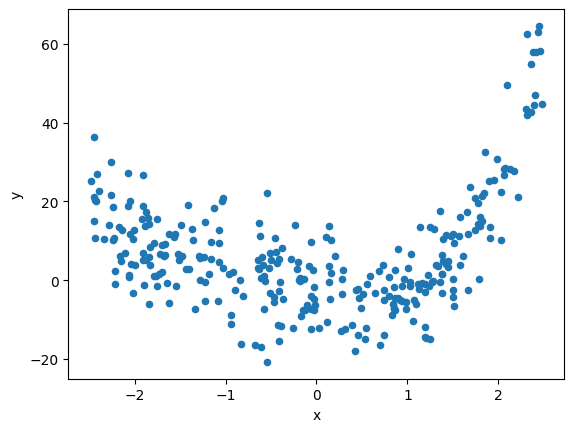

In [14]:
import pandas as pd
import numpy as np
import pickle
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size=0.2, random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_hat = lin_reg.predict(X_train)
y_test_hat = lin_reg.predict(X_test)

mse_lg_train = mean_squared_error(y_train, y_train_hat)
mse_lg_test = mean_squared_error(y_test, y_test_hat)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

y_train_hat = knn_3_reg.predict(X_train)
y_test_hat = knn_3_reg.predict(X_test)

knn_3_reg_train = mean_squared_error(y_train, y_train_hat)
knn_3_reg_test = mean_squared_error(y_test, y_test_hat)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

y_train_hat = knn_5_reg.predict(X_train)
y_test_hat = knn_5_reg.predict(X_test)

knn_5_reg_train = mean_squared_error(y_train, y_train_hat)
knn_5_reg_test = mean_squared_error(y_test, y_test_hat)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_2_features.fit_transform(X_train)
X_test_poly = poly_2_features.transform(X_test)

poly_2_lin_reg = LinearRegression()
poly_2_lin_reg.fit(X_train_poly, y_train)

y_train_hat = poly_2_lin_reg.predict(X_train_poly)
y_test_hat = poly_2_lin_reg.predict(X_test_poly)

poly_2_features_train = mean_squared_error(y_train, y_train_hat)
poly_2_features_test = mean_squared_error(y_test, y_test_hat)

In [20]:
poly_3_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_3_features.fit_transform(X_train)
X_test_poly = poly_3_features.transform(X_test)

poly_3_lin_reg = LinearRegression()
poly_3_lin_reg.fit(X_train_poly, y_train)

y_train_hat = poly_3_lin_reg.predict(X_train_poly)
y_test_hat = poly_3_lin_reg.predict(X_test_poly)

poly_3_features_train = mean_squared_error(y_train, y_train_hat)
poly_3_features_test = mean_squared_error(y_test, y_test_hat)

In [21]:
poly_4_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_4_features.fit_transform(X_train)
X_test_poly = poly_4_features.transform(X_test)

poly_4_lin_reg = LinearRegression()
poly_4_lin_reg.fit(X_train_poly, y_train)

y_train_hat = poly_4_lin_reg.predict(X_train_poly)
y_test_hat = poly_4_lin_reg.predict(X_test_poly)

poly_4_features_train = mean_squared_error(y_train, y_train_hat)
poly_4_features_test = mean_squared_error(y_test, y_test_hat)

In [22]:
poly_5_features = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly_5_features.fit_transform(X_train)
X_test_poly = poly_5_features.transform(X_test)

poly_5_lin_reg = LinearRegression()
poly_5_lin_reg.fit(X_train_poly, y_train)

y_train_hat = poly_5_lin_reg.predict(X_train_poly)
y_test_hat = poly_5_lin_reg.predict(X_test_poly)

poly_5_features_train = mean_squared_error(y_train, y_train_hat)
poly_5_features_test = mean_squared_error(y_test, y_test_hat)

In [23]:
data = {
    "train_mse": [mse_lg_train, knn_3_reg_train, knn_5_reg_train, poly_2_features_train, poly_3_features_train, poly_4_features_train, poly_5_features_train],
    "test_mse": [mse_lg_test, knn_3_reg_test, knn_5_reg_test, poly_2_features_test, poly_3_features_test, poly_4_features_test, poly_5_features_test]
}

df = pd.DataFrame(data, index = ["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg" ])
df

,train_mse,test_mse
lin_reg,231.960435,129.958617
knn_3_reg,38.205222,94.937955
knn_5_reg,46.919720,80.359892
poly_2_reg,98.816867,67.320003
poly_3_reg,68.881488,66.859869
poly_4_reg,63.053570,54.863112
poly_5_reg,62.738098,54.509352


In [24]:
df.to_pickle('mse.pkl')

In [26]:
reg = [
    (lin_reg, None),
    (knn_3_reg, None),
    (knn_5_reg, None),
    (poly_2_lin_reg, poly_2_features),
    (poly_3_lin_reg, poly_3_features),
    (poly_4_lin_reg, poly_4_features),
    (poly_5_lin_reg, poly_5_features),
]

with open('reg.pkl', 'wb') as f:
    pickle.dump(reg, f)